# IMDb web scraping
 
 The goal of this notebook is to familiarize myself with web scraping using the ``BeautifulSoup`` library and bonus point if I can get myself some movie plans for the weekends :).

I decided to scrap the IMDb website which is the reference site when it comes to cinema in order to find the best 5 movies sorted by language or by genre. For the languages, I choosed french, spanish, italian, japanese, korean, turkish, russian and german and for the genres I choosed action, comedy, sience fiction, horror, fantasy, animation, thriller and war.

In order to find the best 5 movies for each language and genre, I selected the 100 most famous movies according to the number of votes and among those 100 I kept the 5 with the best user rating. Finally, I plotted the results using ``seaborn`` barplot.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
languages = ['fr','es','it','ja','ko','tr','ru','de']
lg = ['french', 'spanish', 'italian', 'japanese','korean', 'turkish','russian','german']
genres = ['action', 'comedy', 'sci-fi', 'horror', 'fantasy', 'animation', 'thriller','war']

links_languages = ['https://www.imdb.com/search/title/?title_type=feature&sort=num_votes,desc&primary_language='+ i \
                   +'&count=100' for i in languages ]
links_genres  = ['https://www.imdb.com/search/title/?title_type=feature&genres='+i\
                 +'&sort=num_votes,desc&count=100' for i in genres]

In [192]:
def scrape_imdb(url):
    movie_list=[]
    rating_list=[]
    year_list=[]

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
        "Accept-Language": "en-US,en;q=0.9",  # Set the desired language preference to English
    }


    response = requests.get(url, headers=headers)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        movies = soup.find_all(class_="ipc-title__text")
        for movie in movies[1:-1]:
            movie_list+=[movie.text[3:]]


        ratings = soup.find_all('span', class_='ipc-rating-star--imdb')
        for r in ratings:
            rating_list+=[r.text[:3]]


        years = soup.find_all('span', class_="sc-1e00898e-8 hsHAHC dli-title-metadata-item")
        for y in years:
            if (y.text[:4]).isdigit() and len(y.text)==4:
                year_list += [y.text]
            else : None
            
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
    
    #print(year_list)
    #print(len(movie_list),len(year_list),len(rating_list))
    dic = {'Movie' : movie_list, 'Year' : year_list, 'Rating' : rating_list}   #creating the dataframe
    df = pd.DataFrame(dic)
    df.Rating = pd.to_numeric(df.Rating)
    
    return df.nlargest(5,"Rating")     #best 5 ratings

def plot_data(df, l, i):
    g = sns.barplot(data=df, x='Rating', y='Movie', hue='Year', dodge = False, ax=axes[i])
    axes[i].set(title = f"Top 5 best {l} movies according to IMDB user ratings")
    g.set_xlim(7,9.5)
    g.set(xlabel=None)
    g.set(ylabel=None)


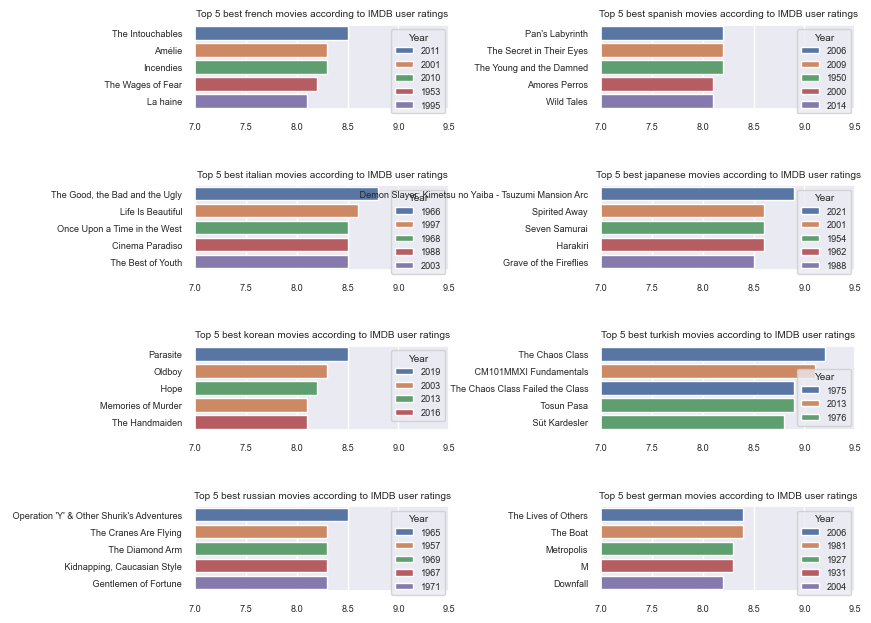

In [193]:
sns.set(font_scale=0.6)

f, axes = plt.subplots(4, 2, figsize=(7,6))
axes = axes.flatten()
f.tight_layout(pad=0.4, w_pad=12, h_pad=5)


for i,l in enumerate(zip(links_languages,lg)):
    df = scrape_imdb(l[0])
    #print(df)
    plot_data(df,l[1],i)

plt.show()


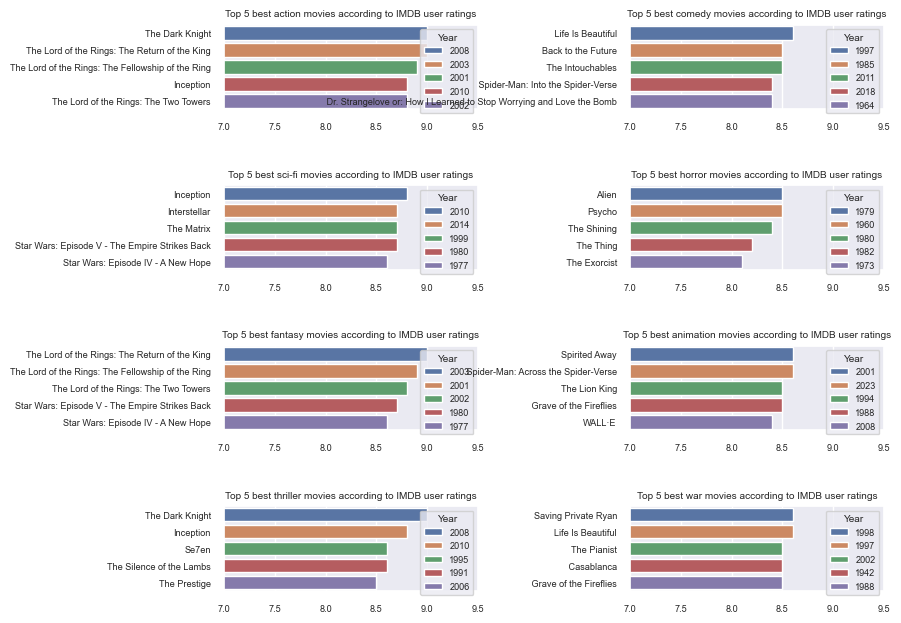

In [194]:
sns.set(font_scale=0.6)

f, axes = plt.subplots(4, 2, figsize=(7,6))
axes = axes.flatten()
f.tight_layout(pad=0.4, w_pad=12, h_pad=5)


for i,l in enumerate(zip(links_genres,genres)):
    df = scrape_imdb(l[0])
    #print(df)
    plot_data(df,l[1],i)

plt.show()